Accuracy of the Naive Bayes classifier: 77.50%


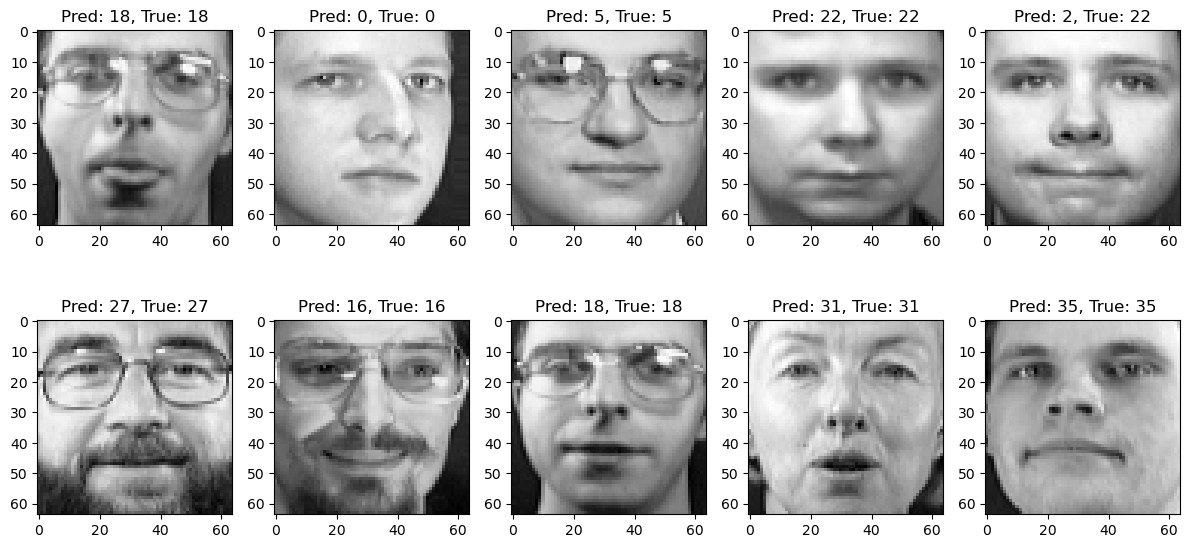

Accuracy of the Naive Bayes classifier (with PCA): 81.25%


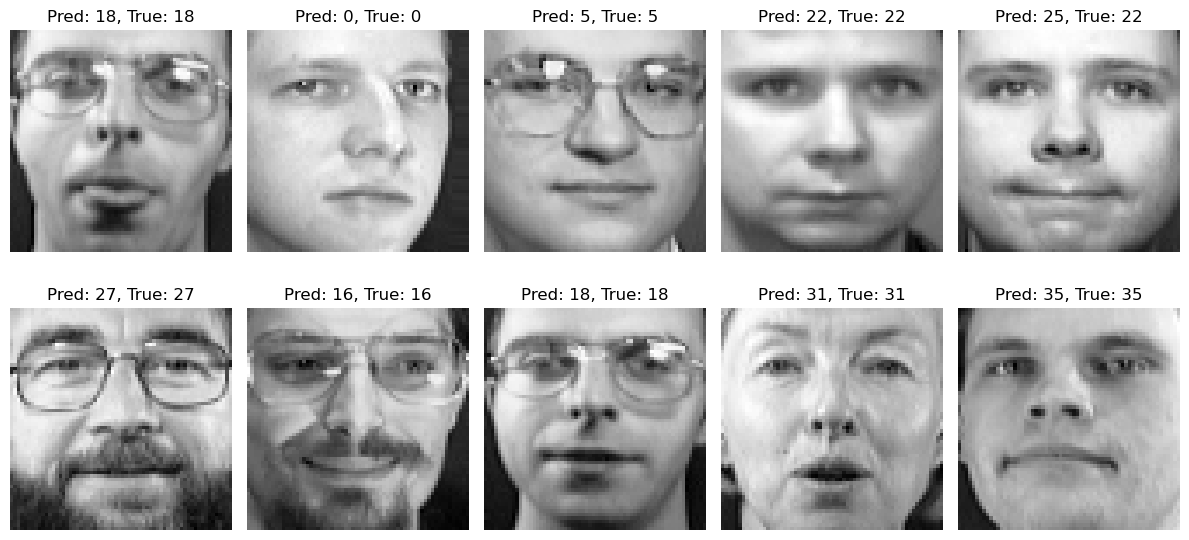

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# ---- Load Olivetti Face Dataset ----
# Load the dataset from sklearn
olivetti_faces = datasets.fetch_olivetti_faces(shuffle=True,random_state=42)
X = olivetti_faces.data  # The 64x64 flattened image data (features)
y = olivetti_faces.target  # The target labels (0-39 for 40 individuals)

# ---- Preprocessing ----
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# ---- Train the Naive Bayes Classifier ----
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# ---- Evaluate the Model ----
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes classifier: {accuracy * 100:.2f}%")

# ---- Visualize the results ----
# Plot some of the test images with their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')  # Reshape to 64x64 image
    ax.set_title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    #ax.axis('off')
plt.tight_layout()
plt.show()

# ---- Optional: Dimensionality Reduction for better visualization ----
# Sometimes PCA (Principal Component Analysis) can help improve performance
# when used with Naive Bayes, especially for image data.

# Reduce the dimensions to 100 using PCA
pca = PCA(n_components=100, whiten=True,random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the Naive Bayes classifier again on PCA-reduced data
nb_classifier.fit(X_train_pca, y_train)

# Evaluate the classifier on PCA-reduced test data
y_pred_pca = nb_classifier.predict(X_test_pca)

# Calculate the accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of the Naive Bayes classifier (with PCA): {accuracy_pca * 100:.2f}%")

# Visualize results after PCA
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')  # Reshape to 64x64 image
    ax.set_title(f"Pred: {y_pred_pca[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()